In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pickle
from time import time
from matplotlib import pyplot as plt

from DynamicTimeAllocationModel import HouseholdModelClass
from figure_manager import FigureManager

path = 'output/'

# c++ settings
do_compile = True
threads = 40

# from EconModel import cpptools
# cpptools.setup_nlopt(folder='cppfuncs/', do_print=True)

# Solve and simulate model

Load calibrated model [TODO]

In [2]:
settings = { 
       'T':30,
       'num_A': 15,
       'num_A_pd': 16,
       'num_K': 12,
       'num_power': 11,
       'num_love': 6,
       
       'max_A': 1_000.0,
       'max_A_pd': 1_000.0,
       'max_Ctot': 2_000.0,
       'max_K': 30.0,
       
       'init_couple_share': 0.77,
       
       'simT': 30,
       'simN': 10_000,

       'num_Ctot': 120,
       'num_marg_u':120,

       'phi': 1.0,
       'phi_mult': 1.0,
       
       'mu': 2.5,
       'mu_mult': 1.0,
       
       'gamma': 0.14,
       'gamma_mult': 1.0,
       
       'p_meet': 0.0,

       'threads':threads,
       'num_multistart': 2,
       
       'do_egm': True,
       'interp_method': 'linear',
       'interp_inverse': True,
       
       'precompute_intratemporal': True,
       'centered_gradient': True,
       
       
       
       
       'mu': 3.5172, 
       'mu_mult': 1.0,#1.0533,
       'gamma': 0.0677,
       'gamma_mult': 1.0,#1.1857,
       
       'eta'            : 2.85,
       'eta_mult'       : 1.0,
       'phi'            : 1.97,
       'phi_mult'       : 1.0,

       'alpha'          : 1.0,#1.18,
       'zeta'           : 0.40,
       'omega'          : 0.38,
       'pi'             : 0.5,
       
       'lambda_'        : 10.0,
       
       'sigma_love': 0.15,
       'div_cost': 0.0,
       }


# setup model
model = HouseholdModelClass(par=settings)
model.link_to_cpp(force_compile=do_compile)


In [3]:
test = np.ones(2,dtype=np.int_)
test.dtype # should be int32!

dtype('int32')

In [4]:
# version = int(np.__version__[0])
# import re
# re.search(r'\d+', version)
assert int(np.__version__[0])<2, f'Numpy must be before version 2'

In [5]:
# solve and simulate baseline model
model.solve()
model.simulate()

## Productivity (human capital) shocks
Introduce a large shock in a specific period

In [6]:
# print(model.par.num_power//2)
# print(model.par.grid_power)
# print(model.par.grid_power[5])

In [ ]:
age_shock = 30 #agemin: 25
size_shock = 1.0
t_shock = age_shock-25

model_shock = model.copy()
# model_shock.sim.draw_shock_Kw[:,t_shock] = 1.0 + size_shock
model_shock.sim.draw_love[:,t_shock] = -5.0
model_shock.sim.draw_repartner_love[:,t_shock] = -5.0
# model_shock.sim.init_power_idx[:] = 1 # TESTING if the initial power is the cause
model_shock.simulate()

In [ ]:
# questions to the results below:
# Q1: why is there NO change in the power/divorce when love is now super low?
# Q2: should W_lag and those variables not be [it] and not [it_1]? it is the states today. There is a discrepancy between the way love and the rest is updated. 
#       The idea is that we update next period states in the end of the simulation. This also means that the wage process if of.

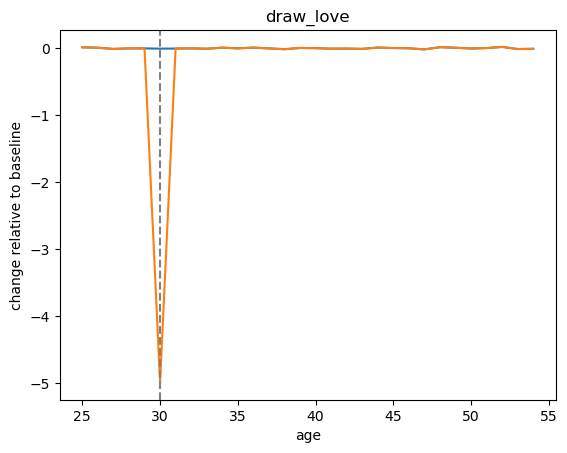

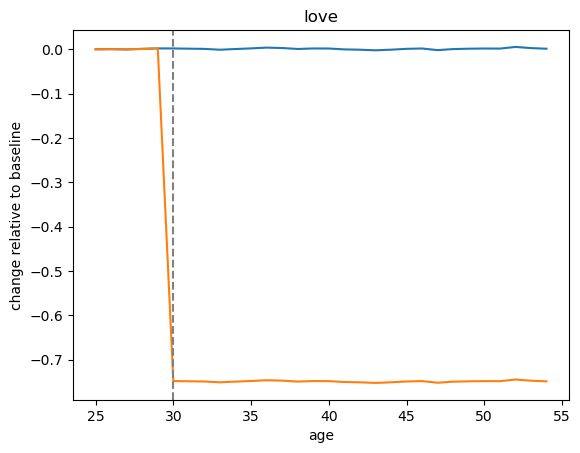

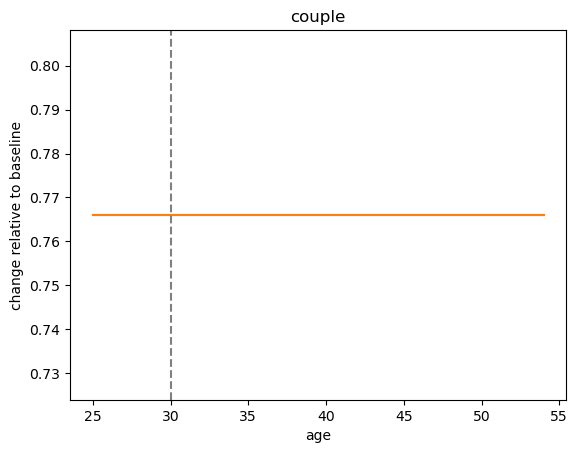

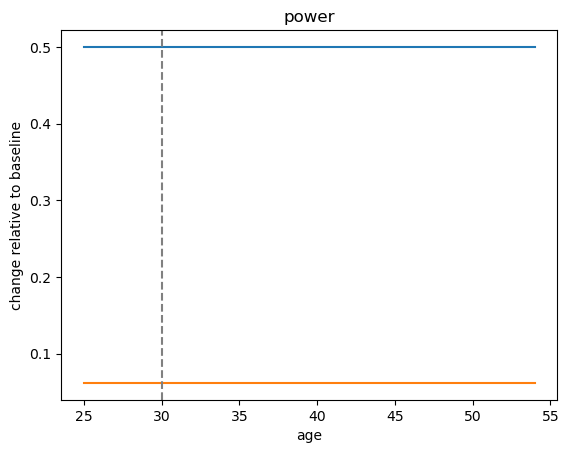

In [12]:
# for var in ('draw_shock_Kw','draw_love','love','Kw','Km','Cw_priv','Cm_priv','C_tot','Qw','hw','hm','lw','lm','couple','power','wage_w','wage_m'):
for var in ('draw_love','love','couple','power'):
    fig,ax = plt.subplots()
    base = np.nanmean(getattr(model.sim,var),axis=0)
    shock = np.nanmean(getattr(model_shock.sim,var),axis=0)
    age = 25+np.arange(base.size)
    # ax.plot(age,shock-base,label='post - base')
    ax.plot(age,base,label='base')
    ax.plot(age,shock,label='post')
    ax.set(title=var,xlabel='age',ylabel='change relative to baseline')
    ax.axvline(age_shock,color='gray',linestyle='--')
    # ax.legend();